## CS457 - Data Science
#### Professor: Dr. Saleha Reza
#### Group Members: Bakhtawar Shafqat, Maham Zehra, Shiza Khalidi
## Analyzing Hate Crimes in USA

### About The Data:
The Federal Bureau of Investigation (FBI) has been collecting data related to hate crimes since the 1990s. In this project, we will be utilizing their datasets which is publicly accessible here. \
https://ucr.fbi.gov/hate-crime \
Specifically, we will be using data related to the number of hate crime offenses distributed by the known offender’s race, ethnicity, and bias motivation. The other dataset presents state-wise data of hate crime incidents distributed by bias motivation. We collected 5 years of data (from 2013-2017) and compiled it into one dataset. 
Moreover, we have also utilized dataset for global terrorism which can be found here- https://www.kaggle.com/START-UMD/gtd. This dataset contains information on terrorist attacks around the world from 1970 through 2017, including systematic data on domestic as well as international terrorist incidents.
We have also used the dataset of the results for US elections 2016  which can be found here- https://data.world/aaronhoffman/us-general-election-2016. This dataset contains the total number of votes all presidential candidates received in general elections 2016 in every county of the United States. 



### Question 1: How have hate crimes changed in the span of 2013-2017. More specifically, have hate crimes against Muslims increased in last 5 years in the USA? And if so then who are the offenders i.e. what race or religion do the offenders belong to generally?

#### Objectives:

1. To look at the trend of hatecrimes yearwise in the last 5 years and
2. What race or religion do the offenders belong to generally

#### Data descripition:
##### 1. Year -
Represents the year in which hate crimes were recorded
##### 2 .Total Offenders - 
Law enforcement reports the number of offenders and, when possible, the apparent race and ethnicity of the offenders
##### 3. Total Number of Incidents in that year - 
Crimes reported to the FBI involve those motivated by biases based on race, gender, gender identity, religion, disability, sexual orientation, and ethnicity.


#### Initializing the data

In [20]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import math as math
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import linregress

In [22]:
#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf
#%matplotlib inline
# To use plotly in notebooks
#init_notebook_mode(connected=True)
# For offline use
#cf.go_offline()

#### Loading Data from CSV

In [23]:
#Loading the datasets
ml=pd.read_csv('Hatecrimesperrace.csv')

#### Know your Data
Let's check some sample records to have a feel of data you are going to work with

In [24]:
ml.head()

,Year,Offender,Race/Ethnicity,Anti-White,Anti-Black or African American,Anti-American Indian or Alaska Native,Anti-Asian,Anti-Native Hawaiian or Other Pacific Islander,"Anti-Multiple Races, Group",Anti-Hispanic or Latino,...,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.,Sexual Orientation:,Anti-Gay (Male),Anti-Lesbian,"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",Anti-Heterosexual,Anti-Bisexual
0,2013,Total offences,"4,201",728,"2,263",146,158,3,109,376,...,165,135,51,7,"1,402",849,185,317,24,27
1,2013,White,"2,032",176,"1,336",47,69,2,37,220,...,67,39,15,0,564,334,81,126,10,13
2,2013,Black or\nAfrican\nAmerican,649,299,85,31,23,0,8,97,...,20,4,7,2,329,208,41,73,3,4
3,2013,American\nIndian or\nAlaska Native,41,14,9,7,0,0,3,4,...,0,1,0,0,7,4,2,0,0,1
4,2013,Asian,25,4,14,3,1,0,0,2,...,0,0,0,0,11,9,1,1,0,0


Check the number of rows and columns that your dataset has:

In [25]:
#gives (num rows, num col)
ml.shape

(65, 25)

Check datatype of each attribute

In [26]:
ml.dtypes

Year                                                          int64
Offender                                                     object
Race/Ethnicity                                               object
Anti-White                                                    int64
Anti-Black or African American                               object
Anti-American Indian or Alaska Native                         int64
Anti-Asian                                                    int64
Anti-Native Hawaiian or Other Pacific Islander                int64
Anti-Multiple Races, Group                                    int64
Anti-Hispanic or Latino                                       int64
Anti-other ethnicity                                          int64
Religion:                                                    object
Anti-Jewish                                                   int64
Anti-Catholic                                                 int64
Anti-Protestant                                 

How many distinct values does each column have?


In [27]:
ml.nunique()

Year                                                          5
Offender                                                     15
Race/Ethnicity                                               60
Anti-White                                                   51
Anti-Black or African American                               55
Anti-American Indian or Alaska Native                        36
Anti-Asian                                                   36
Anti-Native Hawaiian or Other Pacific Islander                9
Anti-Multiple Races, Group                                   36
Anti-Hispanic or Latino                                      42
Anti-other ethnicity                                         44
Religion:                                                    51
Anti-Jewish                                                  43
Anti-Catholic                                                28
Anti-Protestant                                              21
Anti-Islamic (Muslim)                   

Use describe method to check basic statiscal measures of your data like count, mean, min, max, std quantiles etc

In [28]:
ml.describe()

,Year,Anti-White,Anti-American Indian or Alaska Native,Anti-Asian,Anti-Native Hawaiian or Other Pacific Islander,"Anti-Multiple Races, Group",Anti-Hispanic or Latino,Anti-other ethnicity,Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.,Anti-Gay (Male),Anti-Lesbian,"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",Anti-Heterosexual,Anti-Bisexual
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,2015.000000,147.446154,32.800000,26.476923,1.446154,27.261538,79.153846,71.107692,125.476923,11.723077,6.276923,49.353846,29.353846,10.815385,1.338462,139.015385,29.615385,51.938462,4.569231,5.646154
std,1.425219,220.177771,53.854898,40.484607,2.834116,43.487885,121.002225,106.495176,219.066350,18.887420,10.814498,78.420826,48.113288,16.609384,2.545074,202.990108,44.424336,78.374676,7.202363,8.389783
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,8.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,2.000000,0.000000,0.000000
50%,2015.000000,43.000000,7.000000,9.000000,0.000000,9.000000,15.000000,39.000000,11.000000,2.000000,0.000000,16.000000,5.000000,2.000000,0.000000,63.000000,11.000000,14.000000,1.000000,2.000000
75%,2016.000000,169.000000,44.000000,32.000000,2.000000,41.000000,98.000000,82.000000,156.000000,16.000000,8.000000,66.000000,41.000000,14.000000,2.000000,194.000000,39.000000,73.000000,6.000000,8.000000
max,2017.000000,876.000000,281.000000,168.000000,17.000000,215.000000,525.000000,440.000000,976.000000,75.000000,47.000000,381.000000,212.000000,61.000000,13.000000,849.000000,185.000000,321.000000,37.000000,35.000000


#### Analysing the data by Years

In [29]:
#dropping the years and district columns and grouping it by states in a later dataframe
AntiMustlimdrop=ml.drop(['Anti-White','Anti-Black or African American','Anti-American Indian or Alaska Native','Anti-Asian'
,'Anti-Native Hawaiian or Other Pacific Islander','Anti-Hispanic or Latino','Anti-other ethnicity','Sexual Orientation:','Anti-Gay (Male)','Anti-Lesbian',
'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)','Anti-Heterosexual','Anti-Bisexual'],axis=1)

In [30]:
AntiMustlimdrop.head()

,Year,Offender,Race/Ethnicity,"Anti-Multiple Races, Group",Religion:,Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.
0,2013,Total offences,"4,201",109,"1,163",689,74,42,165,135,51,7
1,2013,White,"2,032",37,297,143,25,8,67,39,15,0
2,2013,Black or\nAfrican\nAmerican,649,8,68,35,0,0,20,4,7,2
3,2013,American\nIndian or\nAlaska Native,41,3,1,0,0,0,0,1,0,0
4,2013,Asian,25,0,0,0,0,0,0,0,0,0


In [31]:
ml.head()

,Year,Offender,Race/Ethnicity,Anti-White,Anti-Black or African American,Anti-American Indian or Alaska Native,Anti-Asian,Anti-Native Hawaiian or Other Pacific Islander,"Anti-Multiple Races, Group",Anti-Hispanic or Latino,...,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.,Sexual Orientation:,Anti-Gay (Male),Anti-Lesbian,"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",Anti-Heterosexual,Anti-Bisexual
0,2013,Total offences,"4,201",728,"2,263",146,158,3,109,376,...,165,135,51,7,"1,402",849,185,317,24,27
1,2013,White,"2,032",176,"1,336",47,69,2,37,220,...,67,39,15,0,564,334,81,126,10,13
2,2013,Black or\nAfrican\nAmerican,649,299,85,31,23,0,8,97,...,20,4,7,2,329,208,41,73,3,4
3,2013,American\nIndian or\nAlaska Native,41,14,9,7,0,0,3,4,...,0,1,0,0,7,4,2,0,0,1
4,2013,Asian,25,4,14,3,1,0,0,2,...,0,0,0,0,11,9,1,1,0,0


<Figure size 432x288 with 0 Axes>

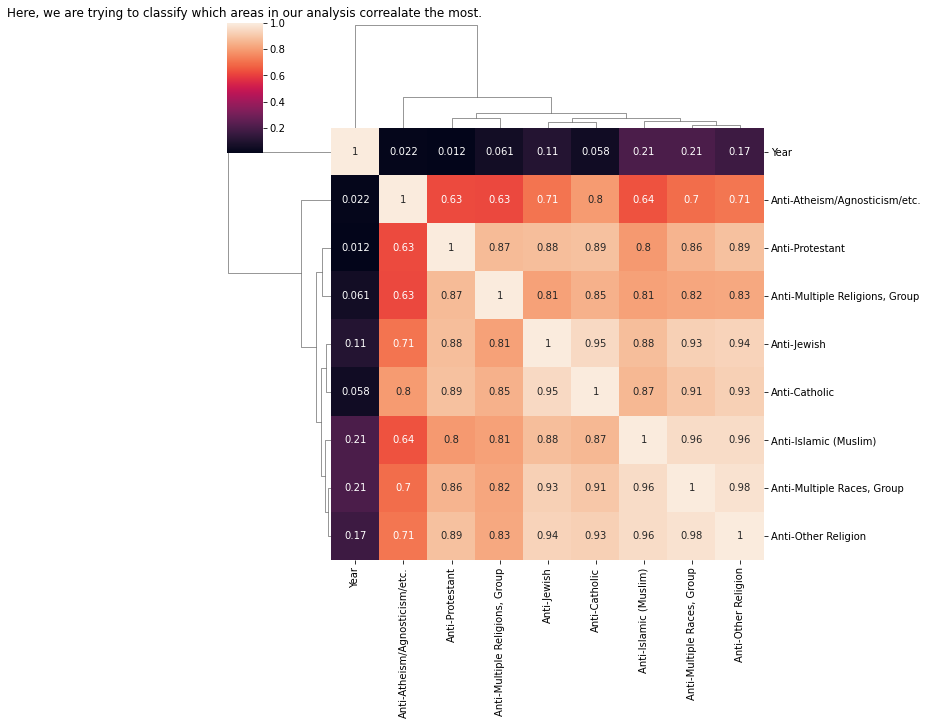

In [32]:
#Generating clustermap i.e it groups numerical variables with high correlation together.
plt.figure()
sns.clustermap(AntiMustlimdrop.corr(),annot=True)
plt.title('Here, we are trying to classify which areas in our analysis correalate the most.')
plt.savefig('CrimeCorrelation.png')

In [33]:
#Moderate correlation has been observed between the followingcrime categories- Murder, Kidnapping and abduction, Assault on women and other crimes against SC's.
#Thus grouping the ones with more correlation and creating another dataframe.
#Creating a new dataset and summing the number of crimes by category, offender wise.
swise=AntiMustlimdrop.groupby(['Offender']).sum()
#Summing up all the crimes offender-wise in a new column.
swise['SumTot']=swise.sum(axis=1)
swise.reset_index(inplace=True)
swise.head()


,Offender,Year,"Anti-Multiple Races, Group",Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.,SumTot
0,American\nIndian or\nAlaska Native,10075,3,4,1,0,7,2,1,0,10093
1,Asian,10075,1,12,3,0,5,11,3,1,10111
2,Black or\nAfrican\nAmerican,10075,84,146,19,11,136,61,31,5,10568
3,Group\nof\nmultiple\nraces,8062,29,36,6,1,34,20,7,0,8195
4,Group\nof\nmultiple \nraces,2013,0,4,2,0,16,0,0,0,2035


In [34]:
# #Creating a new dataset and summing the number of crimes by category, White offender wise.
# ywise=AntiMustlimdrop.groupby(['Year']).sum()

# #Summing up all the crimes year wise in a new column.
# ywise['Total']=ywise.sum(axis=1)
# ywise.reset_index(inplace=True)
# ywise.head()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
df2 = AntiMustlimdrop.loc[AntiMustlimdrop['Offender'] == 'Total offences']
df2.head()
df1 = df2[['Year','Offender','Anti-Islamic (Muslim)', 'Anti-Jewish','Anti-Catholic','Anti-Protestant','Anti-Other Religion']]
df1.head()
hate_crimes_df = df1.rename({'Anti-Islamic (Muslim)': 'Anti-muslim-crimes'}, axis=1)  # new method


# #Summing up all the crimes year wise in a new column.
# hate_crimes_df['Total']=hate_crimes_df.sum(axis=1)
# hate_crimes_df.reset_index(inplace=True)
# hate_crimes_df.head()

# # new=df1.rename(columns={'Anti-Islamic (Muslim)': 'Anti-muslim-crimes'}, inplace=True)


hate_crimes_df['Total']=hate_crimes_df.sum(axis=1)
hate_crimes_df['Total']=hate_crimes_df['Total']-hate_crimes_df['Year']
hate_crimes_df.head()
# #bar plot
# ax = hate_crimes_df.plot.bar(x='Year', y='Anti-muslim-crimes', rot=0)


# #Using matplotlib
# plt.figure(figsize=(16,8))
# # plot chart
# ax1 = plt.subplot(121, aspect='equal')
# hate_crimes_df.plot(kind='pie', y = 'Anti-muslim-crimes', ax=ax1, autopct='%1.1f%%', 
#  startangle=90, shadow=False, labels=hate_crimes_df['Year'], legend = False, fontsize=14)

# # plot table
# ax2 = plt.subplot(122)
# plt.axis('off')
# tbl = table(ax2, hate_crimes_df, loc='center')
# tbl.auto_set_font_size(False)
# tbl.set_fontsize(14)
# plt.show()


,Year,Offender,Anti-muslim-crimes,Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Other Religion,Total
0,2013,Total offences,165,689,74,42,135,1105
13,2014,Total offences,178,635,67,28,120,1028
26,2015,Total offences,301,695,59,47,193,1295
39,2016,Total offences,381,834,63,20,186,1484
52,2017,Total offences,314,976,75,40,212,1617


In [36]:
AntiMustlimdrop.groupby(['Year']).sum()

,"Anti-Multiple Races, Group",Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.
Year,,,,,,,,
2013,221,1387,150,85,332,270,103,14
2014,238,1286,137,60,399,247,108,30
2015,342,1472,133,115,740,388,228,4
2016,440,1849,147,54,930,456,121,15
2017,531,2162,195,94,807,547,143,24


### Observations

#### Analysing the data yearwise.

In [37]:
# #Comparison of Anti-Muslim Crimes with other Religious Hate Crimes
# for x in ywise.columns:
#     if x=='Year':
#         continue
#     plt.figure()
#     sns.lineplot(x=ywise['Year'],y=ywise[x],data=ywise)
#     plt.savefig(f'{x}.png')

,Year,Anti-muslim-crimes,Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Other Religion,Total
0,2013,165,689,74,42,135,1105
13,2014,178,635,67,28,120,1028
26,2015,301,695,59,47,193,1295
39,2016,381,834,63,20,186,1484
52,2017,314,976,75,40,212,1617


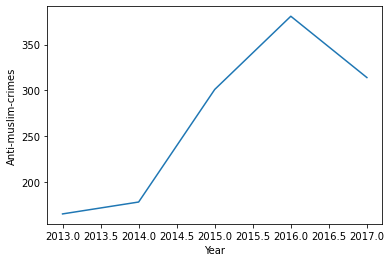

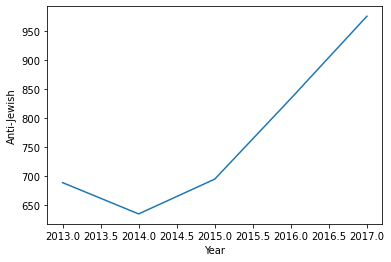

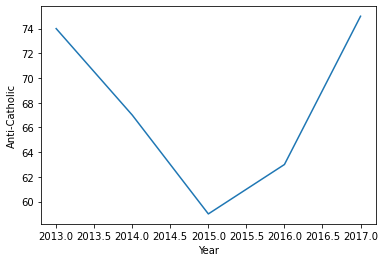

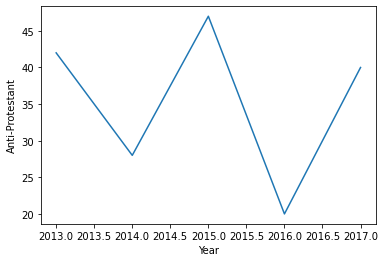

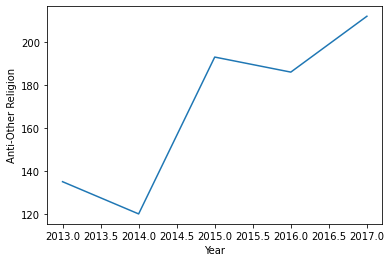

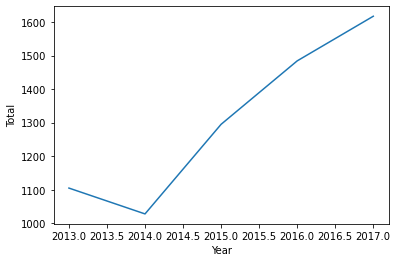

In [38]:
# #Comparison of Anti-Muslim Crimes with other Religious Hate Crimes
hate_crimes_df.dtypes
del hate_crimes_df['Offender']
hate_crimes_df.astype(float)
for x in hate_crimes_df.columns:
    if x=='Year':
        continue
    plt.figure()
    sns.lineplot(x=hate_crimes_df['Year'],y=hate_crimes_df[x],data=hate_crimes_df)
    plt.savefig(f'{x}.png')
hate_crimes_df.head()

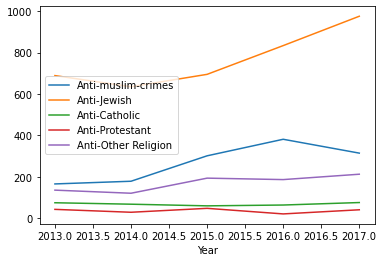

In [39]:
#Analysing and comparing the crime against muslims with other religious crime rates
hate_crimes_df2=hate_crimes_df
del hate_crimes_df2['Total']
hate_crimes_df2.groupby(['Year']).sum().plot.line()

Text(0, 0.5, 'Sum of all crimes committed against Muslims')

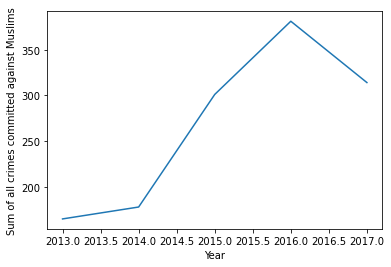

In [40]:
##Drawing a lineplot for the overall number of Anti Muslim crimes , categorized by years.
sns.lineplot(x=hate_crimes_df['Year'],y=hate_crimes_df['Anti-muslim-crimes'],data=hate_crimes_df)
plt.ylabel('Sum of all crimes committed against Muslims')


Text(0.5, 1.0, 'Yearly Trend of Anti-Islamic hate crime activities')

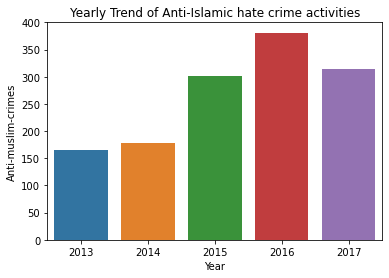

In [41]:
##Drawing a barchart for the overall number of Anti Muslim crimes , over 5 years
from numpy import median
ax = sns.barplot(x=hate_crimes_df['Year'],y=hate_crimes_df['Anti-muslim-crimes'],data=hate_crimes_df)
plt.title('Yearly Trend of Anti-Islamic hate crime activities')

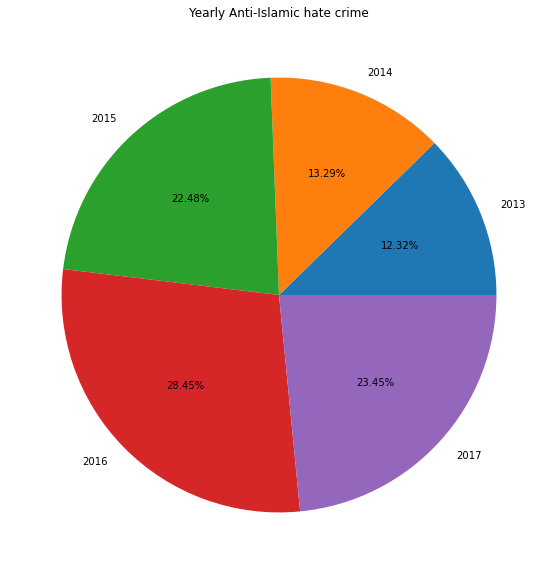

In [42]:
#Using matplotlib
fig1 = plt.figure(figsize =(20, 10)) 
plt.pie(hate_crimes_df['Anti-muslim-crimes'], labels = hate_crimes_df['Year'],autopct='%1.2f%%')
# show plot 
plt.title('Yearly Anti-Islamic hate crime')
plt.show() 


##Analysing Data Offender-wise

Text(0.5, 0, 'Year')

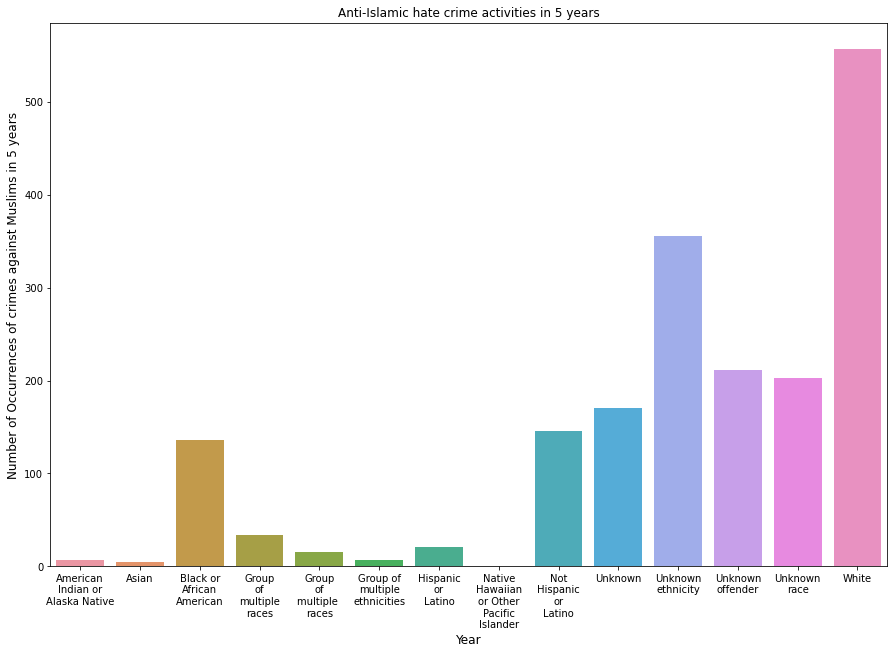

In [43]:
##Drawing a barchart for the overall number of Anti Muslim crimes , categorized by offenders.
plt.figure(figsize=(15,10))
df_filtered = swise[swise['Offender'] != "Total offences"] 
ax = sns.barplot(x=df_filtered['Offender'],y=df_filtered['Anti-Islamic (Muslim)'],data=swise)
plt.title('Anti-Islamic hate crime activities in 5 years')
plt.ylabel('Number of Occurrences of crimes against Muslims in 5 years', fontsize=12)
plt.xlabel('Year', fontsize=12)


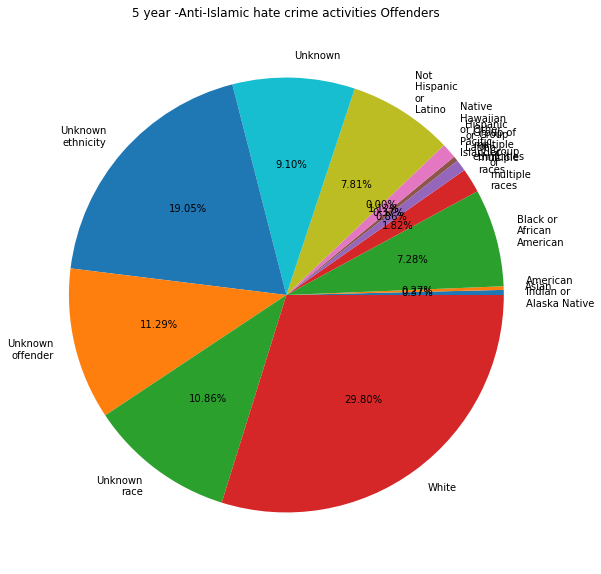

In [44]:
#Using matplotlib
df_filtered = swise[swise['Offender'] != "Total offences"] 
fig1 = plt.figure(figsize =(30, 10)) 
plt.pie(df_filtered['Anti-Islamic (Muslim)'], labels = df_filtered['Offender'],autopct='%1.2f%%')
# show plot 
plt.title('5 year -Anti-Islamic hate crime activities Offenders')
plt.show() 



### Question 2: Is there a correlation between hate crimes against minorities and republican voters? -correlation between cities/states where Trump got most votes in 2016 and hate crimes from 2013-2016? Have hate crimes increased during Trump’s term?

#### Objectives:

1. To look at the correlation between votes and hate crimes
2. Increase in hate crimes after elections 2016

### Initializing the data

In [45]:
election = pd.read_csv("us-election-2016-results-by-county.csv")
crime = pd.read_csv("Yearly-Data-Per-State.csv")

print('Total number of rows in the dataset = ', election.shape[0])
print('Total number of rows in the dataset = ', crime.shape[0])


Total number of rows in the dataset =  15565
Total number of rows in the dataset =  250


#### Know your Data
Let's check some sample records and basic graphs to have a feel of data you are going to work with

In [46]:
crime.head(5)

,Year,State,Race/Ethnicity/Ancestry,Religion,Sexual orientation
0,2013,Alabama,5.0,0.0,1.0
1,2013,Alaska,8.0,0.0,0.0
2,2013,Arizona,97.0,30.0,27.0
3,2013,Arkansas,19.0,0.0,8.0
4,2013,California,489.0,129.0,217.0


In [47]:
election.head(5)

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0


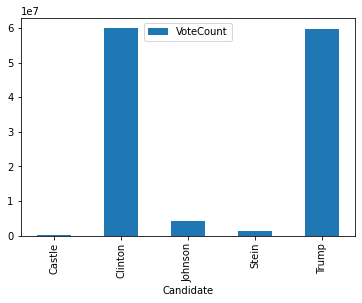

In [48]:
total = election.groupby('Candidate').sum().reset_index()
total.plot.bar(x='Candidate',y='VoteCount')

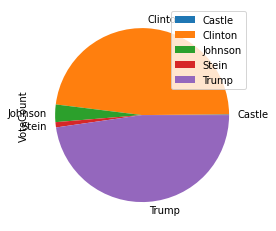

In [49]:
election.groupby('Candidate').sum().plot.pie(y='VoteCount')

In [50]:
trump = election[election['Candidate']=='Trump']
trump = trump.groupby('StateName').sum().reset_index()
trump.head()

,StateName,CountyFips,CountyTotalVote,VoteCount
0,alabama,71489,2078165,1306925.0
1,alaska,2000,246588,130415.0
2,arizona,60208,1960053,972900.0
3,arkansas,380625,1121684,677904.0
4,california,351364,8930459,2969532.0


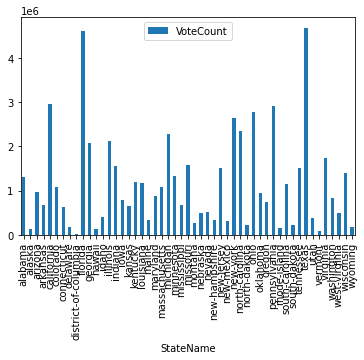

In [51]:
trump.plot.bar(x='StateName',y='VoteCount')

#### Analyzing data to find a correlation between hate crimes against minorities and republican voters?

In [52]:
df = election[election['Party']=="GOP"].groupby(['StateName']).sum()
df = df.reset_index()
df['VotePercent'] = df['VoteCount'] / df['CountyTotalVote'] * 100
df.head()

,StateName,CountyFips,CountyTotalVote,VoteCount,VotePercent
0,alabama,71489,2078165,1306925.0,62.888414
1,alaska,2000,246588,130415.0,52.887813
2,arizona,60208,1960053,972900.0,49.636413
3,arkansas,380625,1121684,677904.0,60.436273
4,california,351364,8930459,2969532.0,33.251729


In [53]:
df2 = crime[crime['Year']!=2017].groupby(['State']).sum()
df2 = df2.reset_index()
del df2['Year']
df2['State'] = df2['State'].str.lower()
df2.head()

,State,Race/Ethnicity/Ancestry,Religion,Sexual orientation
0,alabama,33.0,2.0,3.0
1,alaska,31.0,0.0,2.0
2,arizona,537.0,170.0,192.0
3,arkansas,38.0,2.0,11.0
4,california,1854.0,619.0,800.0


In [54]:
q_1 = df.merge(df2, left_on='StateName', right_on='State')
q_1.corr()

,CountyFips,CountyTotalVote,VoteCount,VotePercent,Race/Ethnicity/Ancestry,Religion,Sexual orientation
CountyFips,1.000000,0.425591,0.532491,0.188413,0.084783,-0.046020,0.014014
CountyTotalVote,0.425591,1.000000,0.967243,-0.261360,0.555685,0.511730,0.582923
VoteCount,0.532491,0.967243,1.000000,-0.083217,0.430815,0.333392,0.416547
VotePercent,0.188413,-0.261360,-0.083217,1.000000,-0.352621,-0.464733,-0.432511
Race/Ethnicity/Ancestry,0.084783,0.555685,0.430815,-0.352621,1.000000,0.905595,0.934763
Religion,-0.046020,0.511730,0.333392,-0.464733,0.905595,1.000000,0.978510
Sexual orientation,0.014014,0.582923,0.416547,-0.432511,0.934763,0.978510,1.000000


#### Analyzing data to find correlation between cities/states where Trump got most votes in 2016 and hate crimes from 2013-2016?

In [55]:
df3 = election.groupby(['StateName','Candidate']).sum().reset_index()
df3['VotePercent'] = df3['VoteCount'] / df3['CountyTotalVote'] * 100
#df3.reset_index()
df3.head()

,StateName,Candidate,CountyFips,CountyTotalVote,VoteCount,VotePercent
0,alabama,Castle,71489,2078165,0.0,0.000000
1,alabama,Clinton,71489,2078165,718084.0,34.553753
2,alabama,Johnson,71489,2078165,43869.0,2.110949
3,alabama,Stein,71489,2078165,9287.0,0.446885
4,alabama,Trump,71489,2078165,1306925.0,62.888414


In [56]:
mostVotes = df3.loc[df3.groupby('StateName')['VotePercent'].idxmax()].reset_index()
mostVotes.head(20)

,index,StateName,Candidate,CountyFips,CountyTotalVote,VoteCount,VotePercent
0,4,alabama,Trump,71489,2078165,1306925.0,62.888414
1,9,alaska,Trump,2000,246588,130415.0,52.887813
2,14,arizona,Trump,60208,1960053,972900.0,49.636413
3,19,arkansas,Trump,380625,1121684,677904.0,60.436273
4,21,california,Clinton,351364,8930459,5488261.0,61.455531
5,26,colorado,Clinton,515983,2401267,1126384.0,46.907903
6,31,connecticut,Clinton,72064,1528817,823360.0,53.856021
7,36,delaware,Clinton,30009,441535,235581.0,53.355000
8,41,district-of-columbia,Clinton,11001,280272,260223.0,92.846592
9,49,florida,Trump,808550,9386750,4605515.0,49.064000


In [57]:
q_2 = df2.merge(mostVotes, left_on='State', right_on='StateName')
q_2 = q_2[q_2['Candidate']=='Trump']
q_2.head(25)

,State,Race/Ethnicity/Ancestry,Religion,Sexual orientation,index,StateName,Candidate,CountyFips,CountyTotalVote,VoteCount,VotePercent
0,alabama,33.0,2.0,3.0,4,alabama,Trump,71489,2078165,1306925.0,62.888414
1,alaska,31.0,0.0,2.0,9,alaska,Trump,2000,246588,130415.0,52.887813
2,arizona,537.0,170.0,192.0,14,arizona,Trump,60208,1960053,972900.0,49.636413
3,arkansas,38.0,2.0,11.0,19,arkansas,Trump,380625,1121684,677904.0,60.436273
8,florida,175.0,52.0,78.0,49,florida,Trump,808550,9386750,4605515.0,49.064000
9,georgia,115.0,15.0,48.0,54,georgia,Trump,2092677,4029564,2068623.0,51.336150
10,idaho,72.0,27.0,17.0,64,idaho,Trump,705936,688235,407199.0,59.165692
12,indiana,186.0,32.0,47.0,74,indiana,Trump,1664464,2717840,1555020.0,57.215289
13,iowa,32.0,4.0,6.0,79,iowa,Trump,1890801,1542880,798923.0,51.781279
14,kansas,179.0,27.0,36.0,84,kansas,Trump,2111025,1147143,656009.0,57.186332


In [58]:
q_2 = q_2.corr()

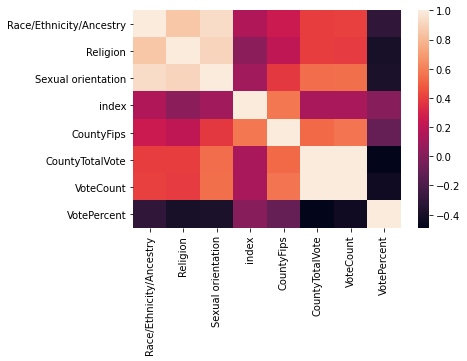

In [59]:
sns.heatmap(q_2)

#### Have hate crimes increased during Trump’s term?

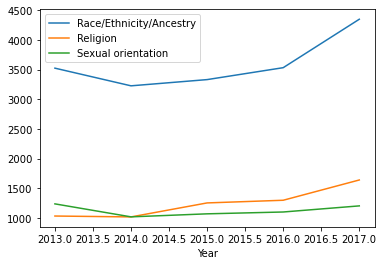

In [60]:
crime.groupby(['Year']).sum().plot.line()

### Loading data from CSV

In [62]:
data = pd.read_csv('Terrorism.csv')

#### Know your data

Let's chech some sample records to have a feel of data you are going to work with

In [64]:
#showing first 10 rows
data.head(10)

,Year,Month,Day,country,country_txt,region,region_txt,provstate,city,latitude,...,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,addnotes,scite1,scite2,scite3
0,2017,1,2,4,Afghanistan,6,South Asia,Kandahar,Takhta Pul,31.320556,...,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,Hostage numbers conflict across sources. Follo...,"""11 construction firm workers released in Kand...","""Taliban kidnap 10 laborers in Kandahar,"" Pajh...","""Gunmen abduct 10 workers in southern Afghanis..."
1,2017,1,3,195,Sudan,11,Sub-Saharan Africa,South Darfur,Fantaga,12.921007,...,5,Firearms,5.0,Unknown Gun Type,2.0,0.0,NaN,"""Bandits Murder Two In Darfur Robbery,"" Radio ...",NaN,NaN
2,2017,1,1,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,Ituri,Saboko,1.452372,...,9,Melee,23.0,Knife or Other Sharp Object,7.0,0.0,Casualty numbers represent a division of the t...,"""Fresh 'Rebel' Attacks In East DR Congo Leave ...","""Latin American Herald Tribune - At Least 14 C...",NaN
3,2017,1,1,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,Ituri,Bialee,1.452370,...,9,Melee,23.0,Knife or Other Sharp Object,7.0,0.0,Casualty numbers represent a division of the t...,"""Fresh 'Rebel' Attacks In East DR Congo Leave ...","""Latin American Herald Tribune - At Least 14 C...",NaN
4,2017,1,1,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,41.106178,...,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,39.0,69.0,The victims included Lebanese civilians Elias ...,"""Istanbul nightclub shooting suspect confesses...","""Islamic State claims responsibility for Istan...","""Manhunt For Shooter After 39 Killed In Istanb..."
5,2017,1,1,200,Syria,10,Middle East & North Africa,Tartus,Tartus,34.895928,...,6,Explosives,13.0,Suicide (carried bodily by human being),4.0,NaN,NaN,"""Islamic State claims bomb attack in Syria's T...","""Two suicide bombers kill 2 Syrian security of...","""Suicide bombers kill two police officers in S..."
6,2017,1,1,153,Pakistan,6,South Asia,Federally Administered Tribal Areas,Niaag Bandar,34.824085,...,6,Explosives,8.0,Landmine,1.0,0.0,The victims included Officer Dilwar Khan.,"""Levies man killed in Bajaur blast,"" Dawn (Pak...","""Levies official killed in Bajaur bomb blast,""...","""Pakistan: Landmine Blast Kills One Levies Off..."
7,2017,1,1,98,Italy,8,Western Europe,Tuscany,Florence,43.769560,...,6,Explosives,9.0,Letter Bomb,0.0,1.0,NaN,"""Rome - 5 anarchists held in Italy over Jan 1 ...","""Parcel bomb at far-right bookshop wounds Ital...","""Rome - Italian policeman injured in far-right..."
8,2017,1,1,209,Turkey,10,Middle East & North Africa,Diyarbakir,Cinar,37.724137,...,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",0.0,0.0,NaN,"""The Latest: Delaware businessman wounded in T...","""The Latest on attack in Turkey: 39 reported d...",NaN
9,2017,1,1,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,41.106178,...,5,Firearms,4.0,Rifle/Shotgun (non-automatic),0.0,2.0,NaN,"""Istanbul mosque sees gunman open fire hours a...","""Two people injured in attack in Istanbul mosq...","""Gunman opens fire in Istanbul mosque,"" Al-Ara..."


Check the number of rows and columns that your dataset has:

In [65]:
#gives (num rows, num col)
data.shape

(68391, 33)

Check datatype of each attribute

In [67]:
data.dtypes

Year                  int64
Month                 int64
Day                   int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
summary              object
alternative_txt      object
attacktype1_txt      object
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
motive               object
weaptype1             int64
weaptype1_txt        object
weapsubtype1        float64
weapsubtype1_txt     object
nkill               float64
nwound              float64
addnotes             object
scite1               object
scite2               object
scite3               object
dtype: object

How many distinct values does each column have?

In [68]:
data.nunique()

Year                    5
Month                  12
Day                    31
country               142
country_txt           142
region                 12
region_txt             12
provstate            1195
city                18142
latitude            28224
longitude           27943
summary             65846
alternative_txt         5
attacktype1_txt         9
targtype1_txt          22
targsubtype1          109
targsubtype1_txt      109
corp1               11480
target1             18848
natlty1               158
natlty1_txt           158
gname                 842
motive               7222
weaptype1              11
weaptype1_txt          11
weapsubtype1           30
weapsubtype1_txt       30
nkill                 155
nwound                155
addnotes             5457
scite1              45644
scite2              32586
scite3              20511
dtype: int64

Use describe method to check basic statiscal measures of your data like count, mean, min, max, std quantiles etc

In [69]:
data.describe()

,Year,Month,Day,country,region,latitude,longitude,targsubtype1,natlty1,weaptype1,weapsubtype1,nkill,nwound
count,68391.000000,68391.000000,68391.000000,68391.00000,68391.000000,67964.000000,67964.000000,63561.000000,67541.000000,68391.000000,62037.000000,64820.000000,62349.000000
mean,2014.918293,6.432001,15.788452,124.35626,8.272697,26.308862,51.453788,47.649958,128.583986,6.499759,11.639844,2.575316,3.011869
std,1.334403,3.396065,8.799554,94.55374,2.317143,13.184468,32.897816,29.239238,94.017627,2.204608,5.937189,12.162973,12.456144
min,2013.000000,1.000000,1.000000,4.00000,1.000000,-42.884049,-124.224996,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,92.00000,6.000000,15.325443,37.762325,24.000000,92.000000,5.000000,5.000000,0.000000,0.000000
50%,2015.000000,6.000000,16.000000,97.00000,10.000000,32.301609,44.375465,35.000000,98.000000,6.000000,12.000000,1.000000,0.000000
75%,2016.000000,9.000000,23.000000,160.00000,10.000000,34.208416,69.273331,74.000000,160.000000,6.000000,16.000000,2.000000,3.000000
max,2017.000000,12.000000,31.000000,1004.00000,12.000000,65.825119,176.986756,113.000000,1004.000000,13.000000,31.000000,1570.000000,1500.000000


In [70]:
#### Data Cleaning

Filtering the data set to show terrorism by Islamic organization

SyntaxError: invalid syntax (<ipython-input-70-0e276c6b96c1>, line 3)

In [71]:
df= data
islamic_groups=['Boko Haram', 'Al-Qaida in Iraq',
'Al-Qaida in the Arabian Peninsula (AQAP)',
'Al-Qaida in the Indian Subcontinent',
'Al-Qaida in the Islamic Maghreb (AQIM)',
'Taliban',
'Tehrik-i-Taliban Pakistan (TTP)',
'Islamic State of Iraq and the Levant (ISIL)', 'Jihadi-inspired extremists', 'Muslim extremists']
df=df.loc[df['gname'].isin(islamic_groups)]
df.head(10)


,Year,Month,Day,country,country_txt,region,region_txt,provstate,city,latitude,...,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,addnotes,scite1,scite2,scite3
0,2017,1,2,4,Afghanistan,6,South Asia,Kandahar,Takhta Pul,31.320556,...,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,Hostage numbers conflict across sources. Follo...,"""11 construction firm workers released in Kand...","""Taliban kidnap 10 laborers in Kandahar,"" Pajh...","""Gunmen abduct 10 workers in southern Afghanis..."
4,2017,1,1,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,41.106178,...,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,39.0,69.0,The victims included Lebanese civilians Elias ...,"""Istanbul nightclub shooting suspect confesses...","""Islamic State claims responsibility for Istan...","""Manhunt For Shooter After 39 Killed In Istanb..."
5,2017,1,1,200,Syria,10,Middle East & North Africa,Tartus,Tartus,34.895928,...,6,Explosives,13.0,Suicide (carried bodily by human being),4.0,NaN,NaN,"""Islamic State claims bomb attack in Syria's T...","""Two suicide bombers kill 2 Syrian security of...","""Suicide bombers kill two police officers in S..."
16,2017,1,1,4,Afghanistan,6,South Asia,Helmand,Marjah,31.467463,...,13,Unknown,NaN,NaN,NaN,NaN,NaN,"""Sangin, Marja Towns under Taliban Attack,"" Da...","""Afghan Official Says Marja, Sangin District A...","""Program Summary: Afghanistan-Lashkar Gah Radi..."
17,2017,1,1,4,Afghanistan,6,South Asia,Helmand,Sangin,32.071931,...,13,Unknown,NaN,NaN,4.0,9.0,NaN,"""Sangin, Marja Towns under Taliban Attack,"" Da...","""Afghan Official Says Marja, Sangin District A...","""Program Summary: Afghanistan-Lashkar Gah Radi..."
18,2017,1,1,4,Afghanistan,6,South Asia,Herat,Chishti Sharif district,34.340130,...,13,Unknown,NaN,NaN,NaN,NaN,NaN,"""Afghan Police Officer Killed In Bomb Blast,"" ...","""Afghan army and police officers kidnapped by ...",NaN
19,2017,1,1,4,Afghanistan,6,South Asia,Logar,Charkh,33.798210,...,6,Explosives,8.0,Landmine,0.0,1.0,Casualty numbers conflict across sources. Foll...,"""Senior Afghan army general injured in roadsid...","""Taliban report 29 soldiers killed or injured ...",NaN
22,2017,1,1,95,Iraq,10,Middle East & North Africa,Al Qadisiyah,Qadisiyah,31.697046,...,6,Explosives,15.0,Vehicle,9.0,15.0,Casualty numbers conflict across sources. Foll...,"""2nd LD: Up to 7 killed in suicide attacks nea...","""Attack on police checkpoint in southern Iraq ...","""IS Claims Suicide Bombing Attack Which Takes ..."
29,2017,1,1,4,Afghanistan,6,South Asia,Ghazni,Ghazni,33.542622,...,9,Melee,NaN,NaN,0.0,6.0,NaN,"""Pakistan: Afghan Taliban publicly execute two...","""Pakistani Commentary Says Afghan Taliban Esta...",NaN
38,2017,1,2,95,Iraq,10,Middle East & North Africa,Saladin,Shirqat,35.499439,...,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,0.0,This incident is part of a set of coordinated ...,"""Baghdad: ISIL claims attack in busy Sadr city...","""Islamic State kills 24 in Baghdad blast,"" Her...","""Iraq: Security Roundup 1900 GMT 2 January 201..."


In [72]:
#gives (num rows, num col)
df.shape

(14533, 33)

In [73]:
df.describe()

,Year,Month,Day,country,region,latitude,longitude,targsubtype1,natlty1,weaptype1,weapsubtype1,nkill,nwound
count,14533.000000,14533.000000,14533.000000,14533.000000,14533.000000,14469.000000,14469.000000,13944.000000,14314.000000,14533.000000,12026.000000,13498.000000,12500.000000
mean,2015.105828,6.493910,15.920595,83.425790,8.518750,30.175918,47.936235,47.450445,93.297471,7.003234,11.224597,6.324863,5.478880
std,1.308499,3.319515,8.755551,70.589668,2.126442,9.067659,20.834267,26.837693,86.872079,2.807314,5.411441,23.252703,20.083248
min,2013.000000,1.000000,1.000000,4.000000,1.000000,-37.906633,-122.331306,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,4.000000,6.000000,31.653943,42.742780,25.000000,4.000000,5.000000,5.000000,1.000000,0.000000
50%,2015.000000,7.000000,16.000000,95.000000,10.000000,33.649971,44.371773,35.000000,95.000000,6.000000,13.000000,2.000000,1.000000
75%,2016.000000,9.000000,24.000000,147.000000,10.000000,35.271023,66.127534,74.000000,147.000000,6.000000,15.000000,6.000000,5.000000
max,2017.000000,12.000000,31.000000,603.000000,12.000000,61.250000,151.211038,113.000000,999.000000,13.000000,31.000000,1570.000000,1500.000000


In [74]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
country                 0
country_txt             0
region                  0
region_txt              0
provstate               0
city                    0
latitude               64
longitude              64
summary                 0
alternative_txt     11683
attacktype1_txt         0
targtype1_txt           0
targsubtype1          589
targsubtype1_txt      589
corp1                   0
target1                 0
natlty1               219
natlty1_txt           219
gname                   0
motive              12382
weaptype1               0
weaptype1_txt           0
weapsubtype1         2507
weapsubtype1_txt     2507
nkill                1035
nwound               2033
addnotes             9340
scite1                  0
scite2               3637
scite3               7207
dtype: int64

In [75]:
df.nunique()

Year                    5
Month                  12
Day                    31
country                61
country_txt            61
region                  9
region_txt              9
provstate             304
city                 3901
latitude             6465
longitude            6395
summary             13707
alternative_txt         5
attacktype1_txt         9
targtype1_txt          21
targsubtype1           99
targsubtype1_txt       99
corp1                2569
target1              3082
natlty1                80
natlty1_txt            80
gname                  10
motive               1464
weaptype1               9
weaptype1_txt           9
weapsubtype1           29
weapsubtype1_txt       29
nkill                 134
nwound                129
addnotes             1333
scite1              10139
scite2               8206
scite3               5745
dtype: int64

#### Data Exploration

Draw a bar chart to show yearly terrorist activities

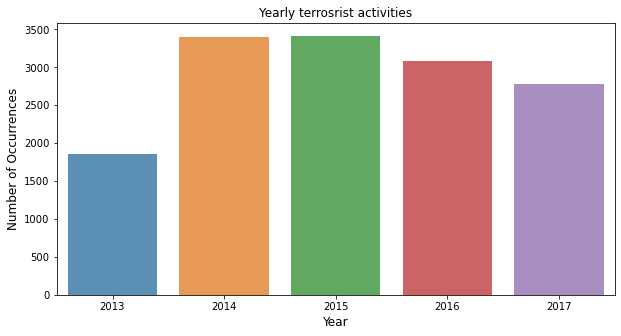

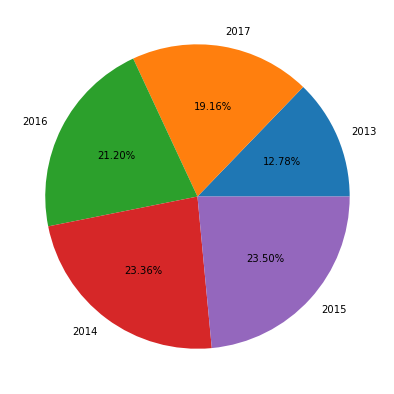

In [76]:
# df.groupby(['Year']).agg({'nkill':np.sum}).reset_index()
# Terrorist activities by Islamic groups per year
yearly_acts = df['Year'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
sns.barplot(yearly_acts.index, yearly_acts.values, alpha=0.8)
plt.title('Yearly terrosrist activities')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

#Using matplotlib
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(yearly_acts.values, labels = yearly_acts.index,autopct='%1.2f%%')
# show plot 
plt.show() 


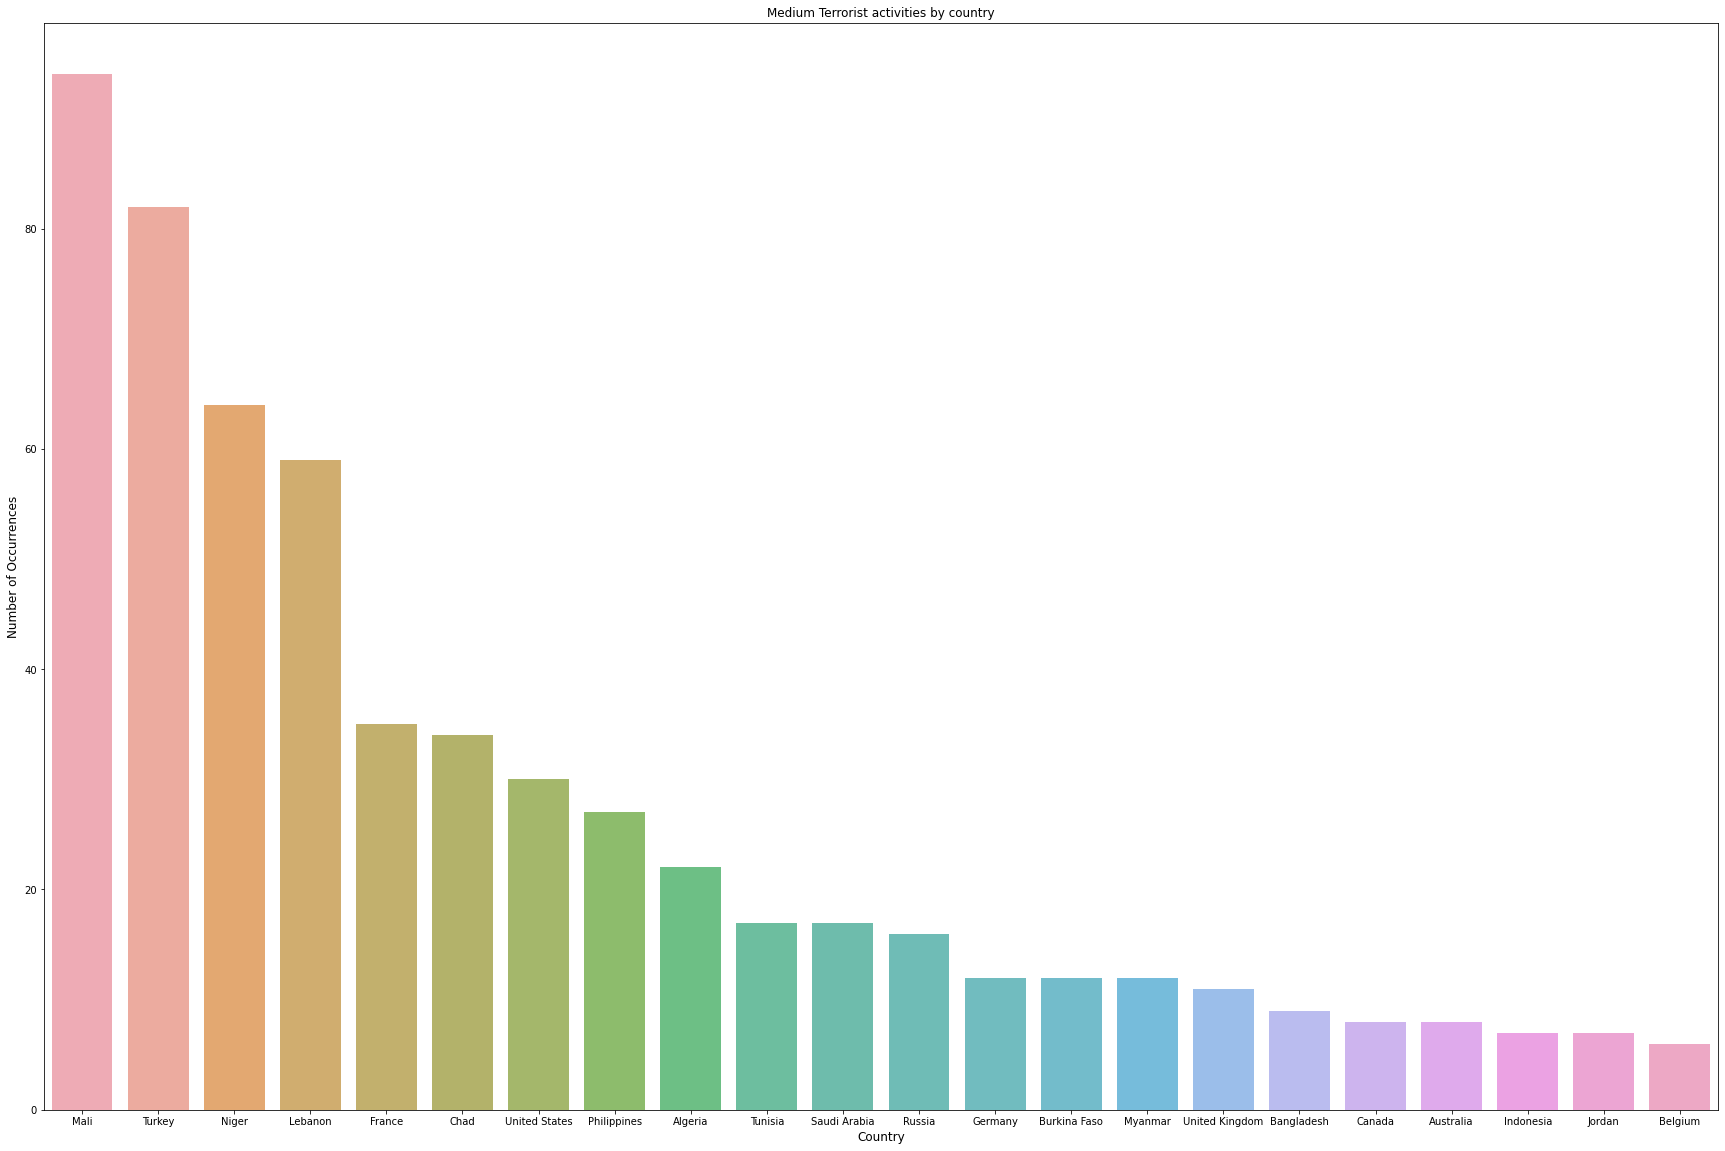

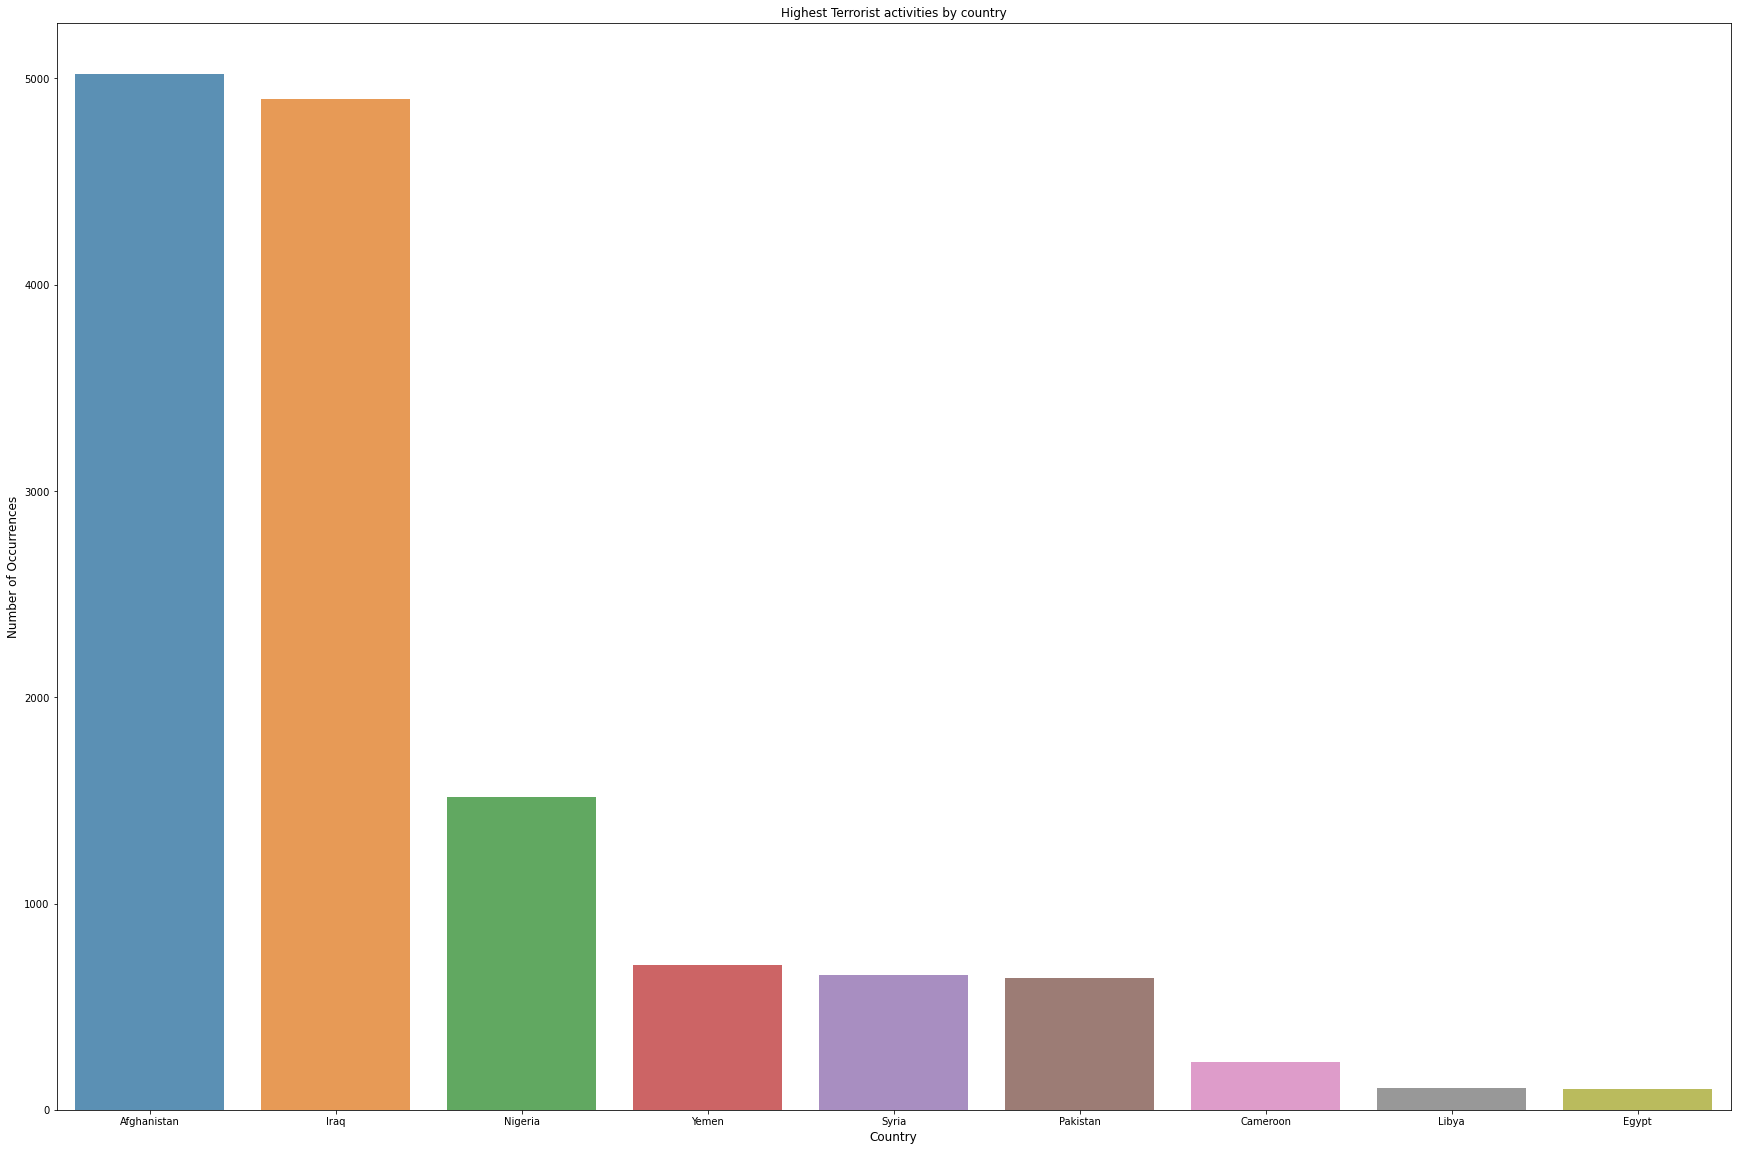

In [77]:
#Country wise killed
country_wise_killed = df.groupby(['country_txt']).agg({'nkill':np.sum}).reset_index()
country_wise_killed = country_wise_killed.sort_values(by=['nkill'], ascending=False)
country_wise_killed.head(60)

#Country wise incients
country_wise_acts = df['country_txt'].value_counts(ascending=False)
country_wise_acts.head(60)
country_wise_acts_middle=country_wise_acts[(country_wise_acts < 100)  &(country_wise_acts > 5)]
plt.figure(figsize=(30,20))
sns.barplot(country_wise_acts_middle.index, country_wise_acts_middle.values, alpha=0.8)
plt.title('Medium Terrorist activities by country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

country_wise_acts_high=country_wise_acts[(country_wise_acts > 100)]
plt.figure(figsize=(30,20))
sns.barplot(country_wise_acts_high.index, country_wise_acts_high.values, alpha=0.8)
plt.title('Highest Terrorist activities by country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [78]:
country_wise_acts_year =df.groupby(["country_txt", "Year"]).size().reset_index(name="Acts")
#  df['country_txt'].value_counts(ascending=False)
country_wise_acts_year.tail(50)

,country_txt,Year,Acts
125,Russia,2016,4
126,Russia,2017,2
127,Saudi Arabia,2014,3
128,Saudi Arabia,2015,7
129,Saudi Arabia,2016,7
130,Somalia,2014,1
131,Somalia,2015,2
132,South Africa,2014,1
133,Spain,2016,1
134,Spain,2017,3


In [79]:
countries_with_terrorism = df['country_txt'].value_counts(ascending=True)
countries_with_terrorism.head(60)

Norway                         1
Kenya                          1
Austria                        1
South Africa                   1
Turkmenistan                   1
Ukraine                        1
Ivory Coast                    1
Tanzania                       1
Albania                        1
Finland                        1
Mozambique                     1
Georgia                        1
Iran                           2
Kyrgyzstan                     2
Italy                          2
Kuwait                         2
Sweden                         2
Thailand                       2
Bahrain                        3
Malaysia                       3
Central African Republic       3
Denmark                        3
Tajikistan                     3
Somalia                        3
Spain                          4
India                          4
Israel                         4
Maldives                       4
West Bank and Gaza Strip       4
Bosnia-Herzegovina             5
Belgium   

Plot histogram of all numeric attrubites to see their distribution

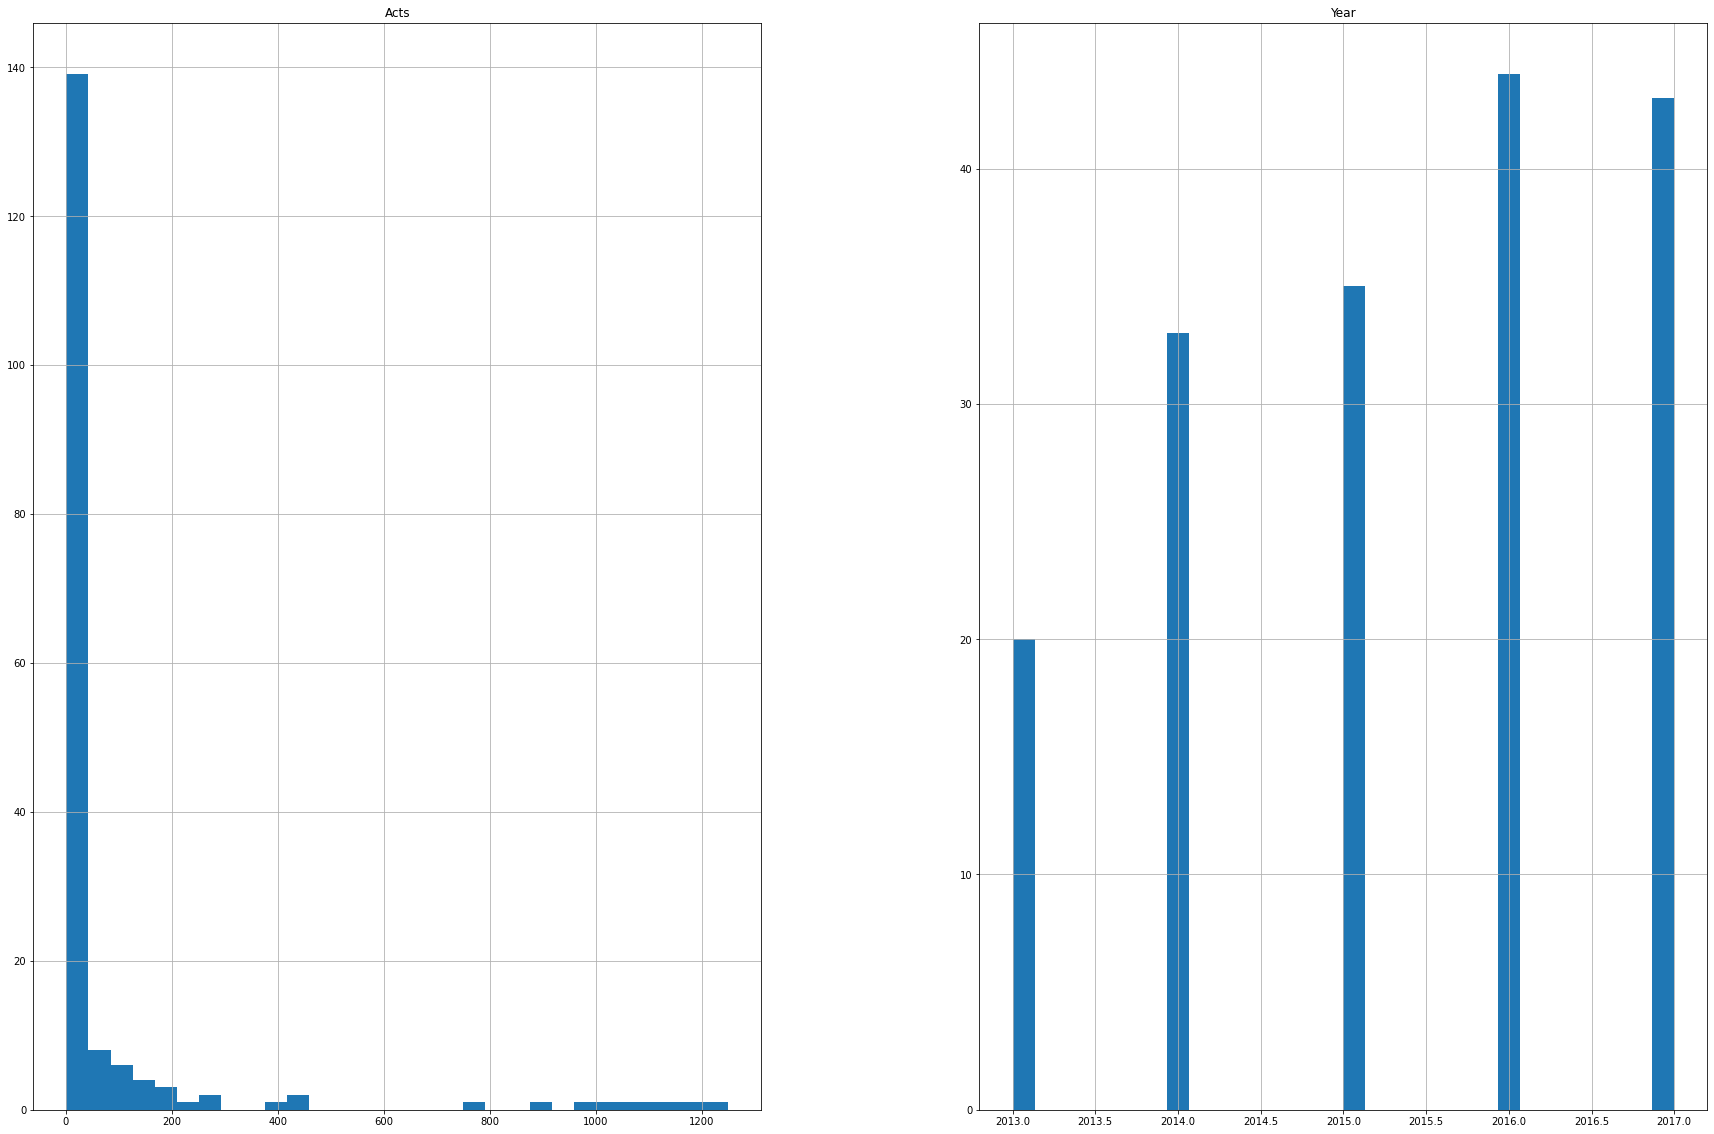

In [80]:
# Plot the histograms of each 
country_wise_acts_year.hist(bins=30, figsize=(30,20))
plt.show()

In [81]:
HateCrimesdata = pd.read_csv('HateCrimes.csv')
HateCrimesdata.head()

,Year,Offender,Race/Ethnicity,Anti-White,Anti-Black or African American,Anti-American Indian or Alaska Native,Anti-Asian,Anti-Native Hawaiian or Other Pacific Islander,"Anti-Multiple Races, Group",Anti-Hispanic or Latino,...,Anti-Islamic (Muslim),Anti-Other Religion,"Anti-Multiple Religions, Group",Anti-Atheism/Agnosticism/etc.,Sexual Orientation:,Anti-Gay (Male),Anti-Lesbian,"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",Anti-Heterosexual,Anti-Bisexual
0,2013,Total offences,"4,201",728,"2,263",146,158,3,109,376,...,165,135,51,7,"1,402",849,185,317,24,27
1,2013,White,"2,032",176,"1,336",47,69,2,37,220,...,67,39,15,0,564,334,81,126,10,13
2,2013,Black or\nAfrican\nAmerican,649,299,85,31,23,0,8,97,...,20,4,7,2,329,208,41,73,3,4
3,2013,American\nIndian or\nAlaska Native,41,14,9,7,0,0,3,4,...,0,1,0,0,7,4,2,0,0,1
4,2013,Asian,25,4,14,3,1,0,0,2,...,0,0,0,0,11,9,1,1,0,0


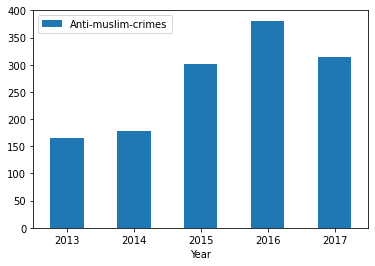

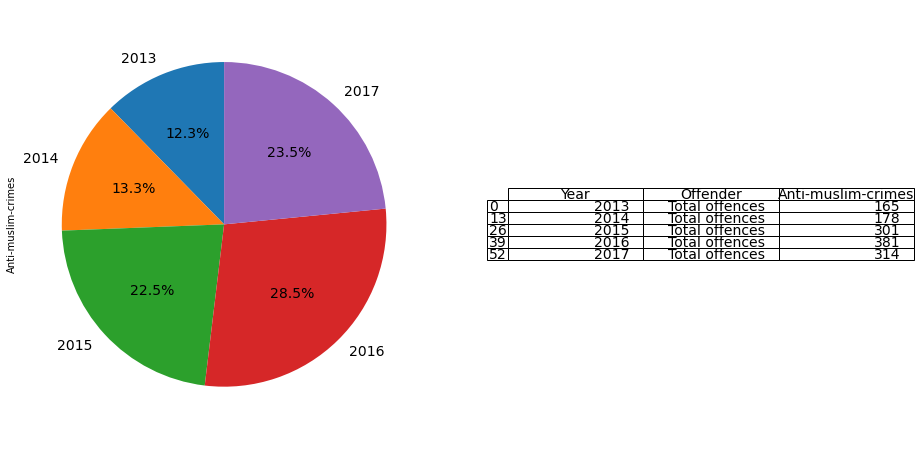

In [82]:
from pandas.plotting import table
df2 = HateCrimesdata.loc[HateCrimesdata['Offender'] == 'Total offences']
df2.head()
df1 = df2[['Year','Offender','Anti-Islamic (Muslim)']]
df1.head()
hate_crimes_df = df1.rename({'Anti-Islamic (Muslim)': 'Anti-muslim-crimes'}, axis=1)  # new method

# new=df1.rename(columns={'Anti-Islamic (Muslim)': 'Anti-muslim-crimes'}, inplace=True)
hate_crimes_df.head()

#bar plot
ax = hate_crimes_df.plot.bar(x='Year', y='Anti-muslim-crimes', rot=0)


#Using matplotlib
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
hate_crimes_df.plot(kind='pie', y = 'Anti-muslim-crimes', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=hate_crimes_df['Year'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, hate_crimes_df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()


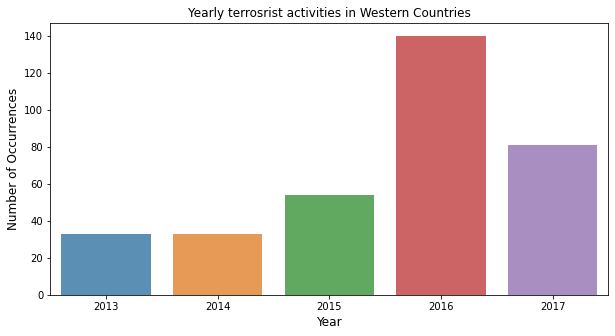

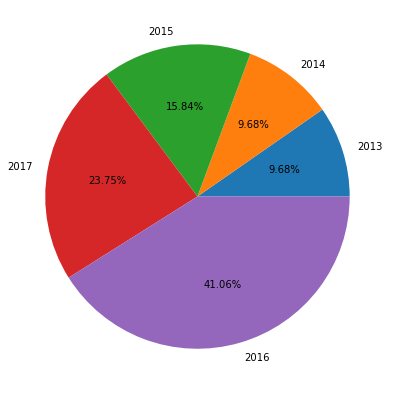

In [83]:
#Terrorist Activities in Western Countries
West = ['Austria'
'Finland',              
'Ukraine',                      
'Ivory Coast',                    
'Georgia',                  
'South Africa',                   
'Norway',                 
'Thailand',                       
'Sweden',                     
'Italy',                       
'Malaysia',                       
'Denmark',                     
'Spain',                      
'Maldives',                      
'India',                          
'Belgium',                        
'Jordan',                         
'Indonesia',                     
'Australia',                      
'Canada',                        
'United Kingdom',               
'Burkina Faso',                  
'Myanmar',                      
'Germany',                      
'Russia',                      
'Tunisia',                     
'Algeria',                     
'Philippines',                  
'United States',                 
'France',                        
'Turkey']
Western_data=df.loc[df['country_txt'].isin(West)]
# Western_data.to_csv(r'C:\Users\HP\Dropbox\My PC (DESKTOP-1H9BIJ9)\Desktop\TerrorismInWest.csv', index = False)
Western_data.head(10)
yearly_acts_west = Western_data['Year'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
sns.barplot(yearly_acts_west.index, yearly_acts_west.values, alpha=0.8)
plt.title('Yearly terrosrist activities in Western Countries')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

#Using matplotlib
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(yearly_acts_west.values, labels = yearly_acts_west.index,autopct='%1.2f%%')
# show plot 
plt.show() 

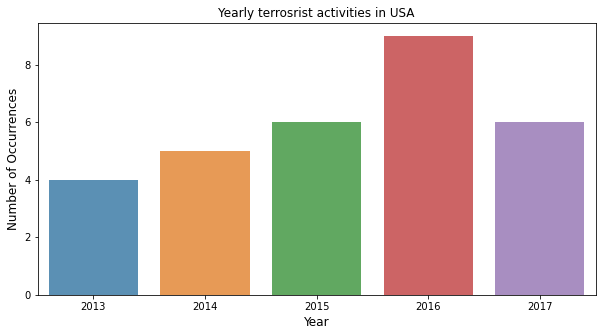

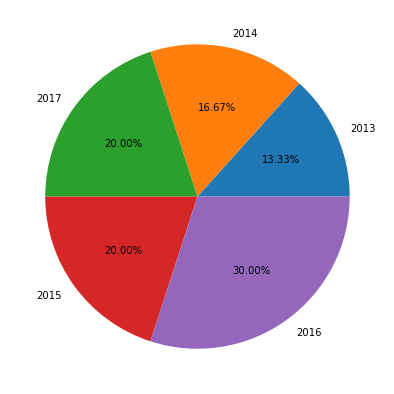

2013    4
2014    5
2017    6
2015    6
2016    9
Name: Year, dtype: int64

In [88]:
us=['United States']
us_data=df.loc[df['country_txt'].isin(us)]
us_data.head(10)
#us_data.to_csv(r'C:\Users\HP\Dropbox\My PC (DESKTOP-1H9BIJ9)\Desktop\TerrorismInUS.csv', index = False)
yearly_acts_us = us_data['Year'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
sns.barplot(yearly_acts_us.index, yearly_acts_us.values, alpha=0.8)
plt.title('Yearly terrosrist activities in USA')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

#Using matplotlib
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(yearly_acts_us.values, labels = yearly_acts_us.index,autopct='%1.2f%%')
# show plot 
plt.show() 
yearly_acts_us.head()

In [89]:
yearly_acts_us=yearly_acts_us.rename_axis('year').to_frame('acts_us')
yearly_acts_west=yearly_acts_west.rename_axis('year').to_frame('acts')
yearly_acts=yearly_acts.rename_axis('year').to_frame('acts')

In [90]:
yearly_acts_us.head()
yearly_acts_west.head()
yearly_acts.head()

,acts
year,
2013,1858
2017,2784
2016,3081
2014,3395
2015,3415


In [91]:
# new['actsInWest']=yearly_acts_west.values
# new['actsinUS']=yearly_acts_us.values
yearly_acts_west = yearly_acts_west.sort_values(by=['year'])
yearly_acts_west.head()
yearly_acts_us = yearly_acts_us.sort_values(by=['year'])
yearly_acts_us.head()
yearly_acts= yearly_acts.sort_values(by=['year'])
yearly_acts.head()

,acts
year,
2013,1858
2014,3395
2015,3415
2016,3081
2017,2784


In [92]:
hate_crimes_df['Terrorist Acts in West']= yearly_acts_west.values
hate_crimes_df['Terrorist Acts in US']= yearly_acts_us.values
hate_crimes_df['Terrorist Acts worldwide']= yearly_acts.values

hate_crimes_df.head()

,Year,Offender,Anti-muslim-crimes,Terrorist Acts in West,Terrorist Acts in US,Terrorist Acts worldwide
0,2013,Total offences,165,33,4,1858
13,2014,Total offences,178,33,5,3395
26,2015,Total offences,301,54,6,3415
39,2016,Total offences,381,140,9,3081
52,2017,Total offences,314,81,6,2784


#### Correlation:
Study correlation between attributes via:
- correlation coefficients
- scatter plot matrix
- plotting heatmap

You can focus on numeric attributes for this.

In [93]:
#correlation coefficients
corr_matrix = hate_crimes_df.corr()
cor_target=corr_matrix
cor_target

,Year,Anti-muslim-crimes,Terrorist Acts in West,Terrorist Acts in US,Terrorist Acts worldwide
Year,1.000000,0.850708,0.717767,0.676123,0.379549
Anti-muslim-crimes,0.850708,1.000000,0.902212,0.911282,0.397646
Terrorist Acts in West,0.717767,0.902212,1.000000,0.959243,0.204638
Terrorist Acts in US,0.676123,0.911282,0.959243,1.000000,0.444667
Terrorist Acts worldwide,0.379549,0.397646,0.204638,0.444667,1.000000


<Figure size 1440x720 with 0 Axes>

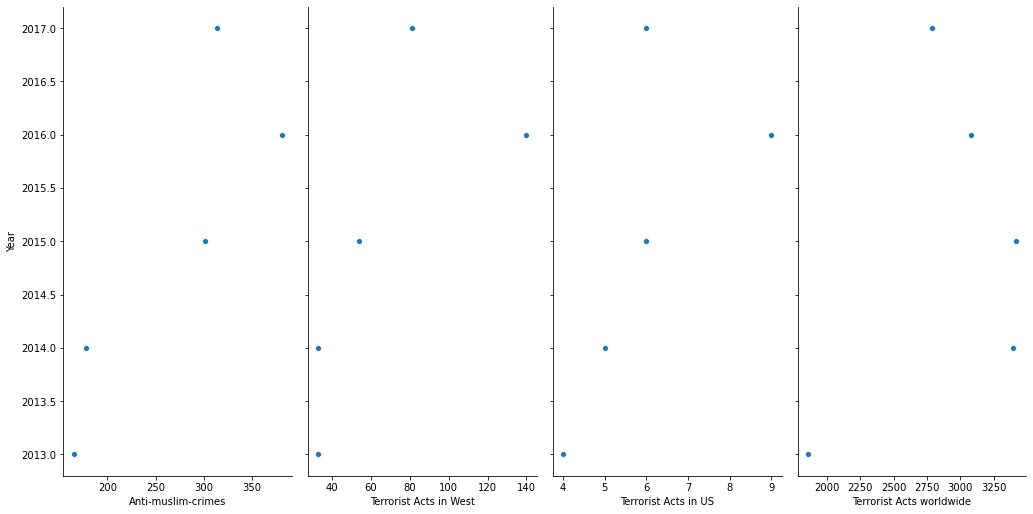

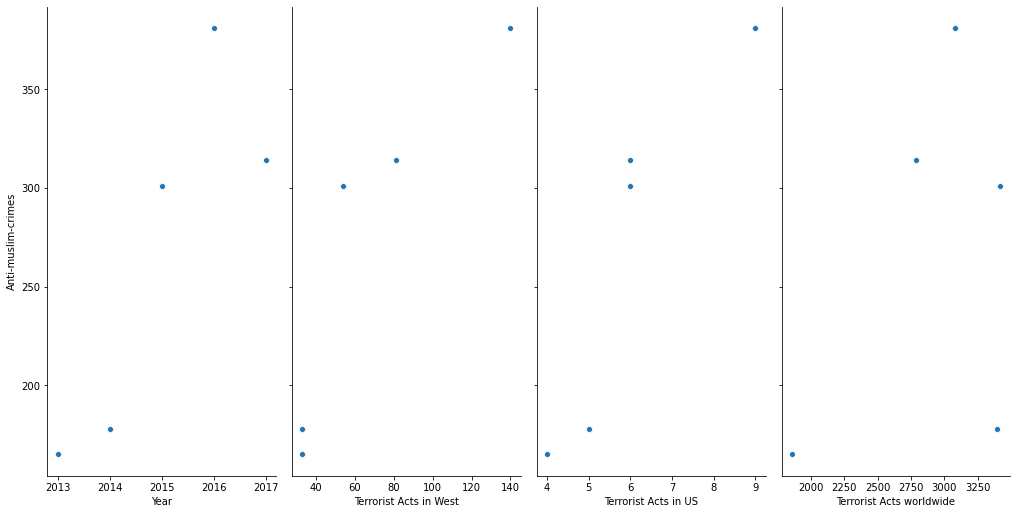

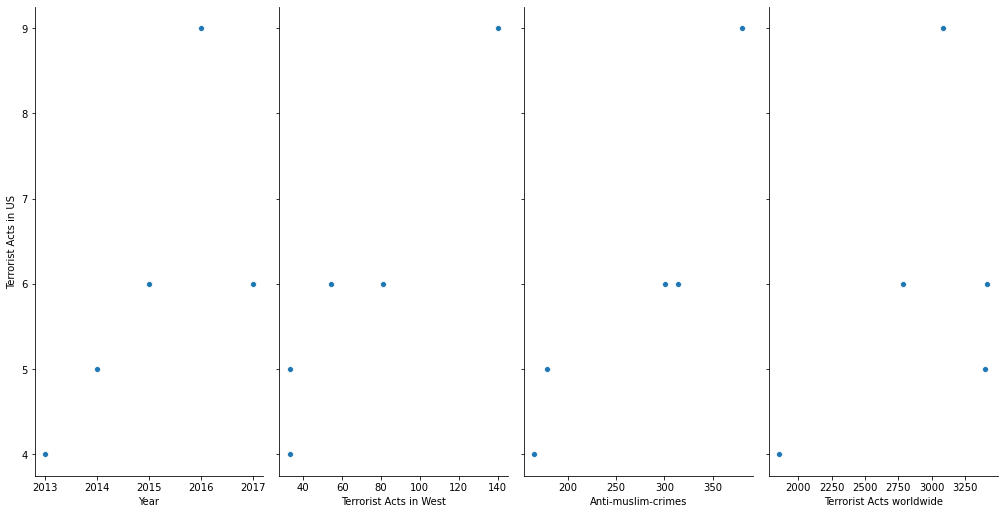

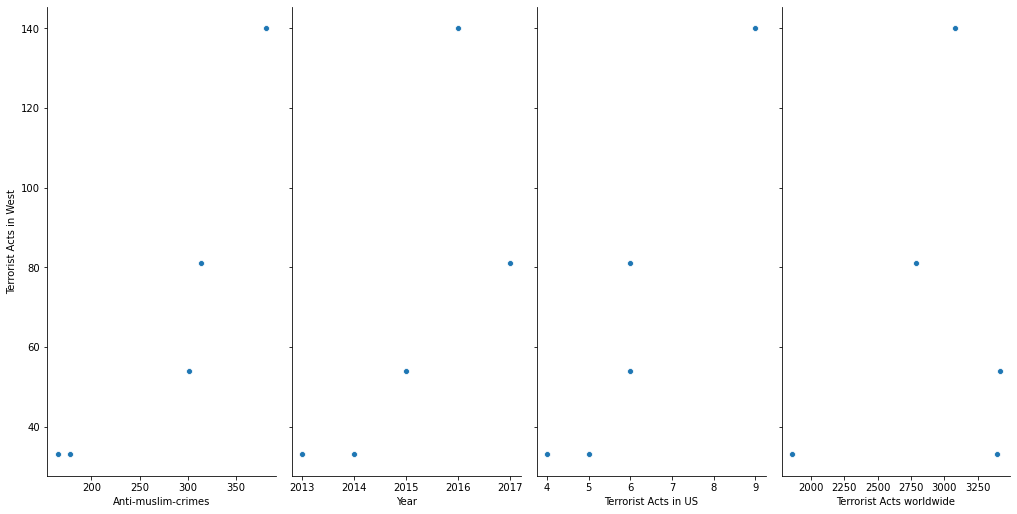

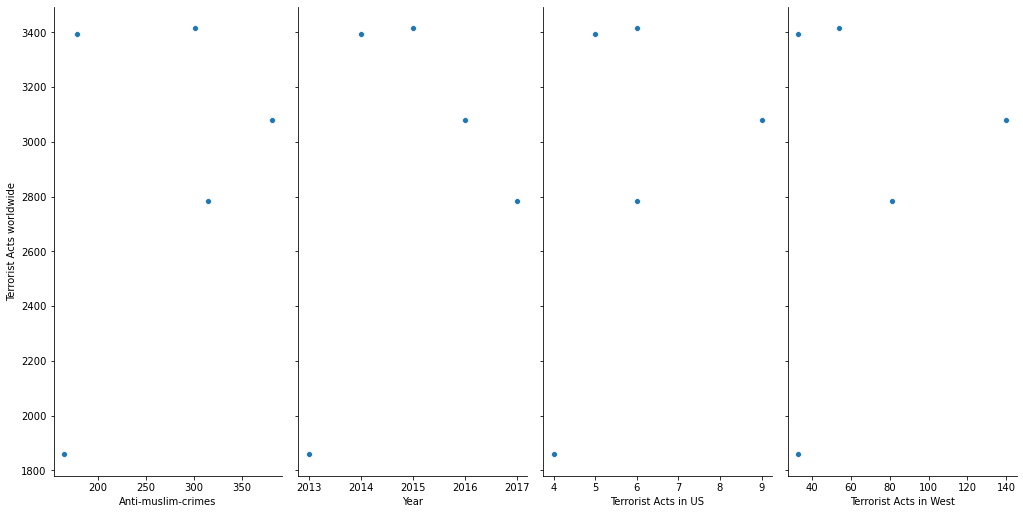

In [94]:
#Scatter plot
fig = plt.figure(figsize=(5,4)) 
fig.set_size_inches(20,10)
sns.pairplot(hate_crimes_df, x_vars=['Anti-muslim-crimes','Terrorist Acts in West','Terrorist Acts in US', 'Terrorist Acts worldwide'], y_vars='Year', height=7, aspect=0.5)
sns.pairplot(hate_crimes_df, x_vars=['Year','Terrorist Acts in West','Terrorist Acts in US', 'Terrorist Acts worldwide'], y_vars='Anti-muslim-crimes', height=7, aspect=0.5)
sns.pairplot(hate_crimes_df, x_vars=['Year','Terrorist Acts in West','Anti-muslim-crimes', 'Terrorist Acts worldwide'], y_vars='Terrorist Acts in US', height=7, aspect=0.5)
sns.pairplot(hate_crimes_df, x_vars=['Anti-muslim-crimes','Year','Terrorist Acts in US', 'Terrorist Acts worldwide'], y_vars='Terrorist Acts in West', height=7, aspect=0.5)
sns.pairplot(hate_crimes_df, x_vars=['Anti-muslim-crimes','Year','Terrorist Acts in US', 'Terrorist Acts in West'], y_vars='Terrorist Acts worldwide', height=7, aspect=0.5)

# sns.pairplot(data, x_vars=['ListPrice','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='OrderQuantity', height=7, aspect=0.5)
# sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='UnitPrice', height=7, aspect=0.5)
# sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'UnitPrice', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='SalesAmount', height=7, aspect=0.5)
# sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'UnitPrice', 'TaxAmount', 'Freight'], y_vars='DiscountAmount', height=7, aspect=0.5)
# sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'UnitPrice', 'Freight'], y_vars='TaxAmount', height=7, aspect=0.5)
# sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'UnitPrice'], y_vars='Freight', height=7, aspect=0.5)


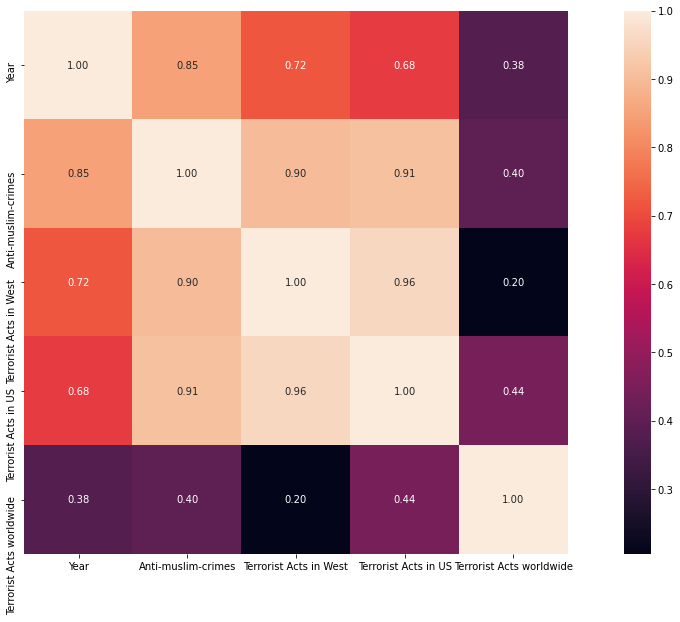

In [95]:
#Heatmap
corrmat =hate_crimes_df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

As we can see Terrorist activities in US and West and hate crimes have high correlation which means that as tarrorism increasedin the west, hate crimes also increased.